# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

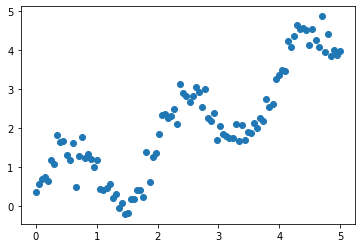

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5721043954555621


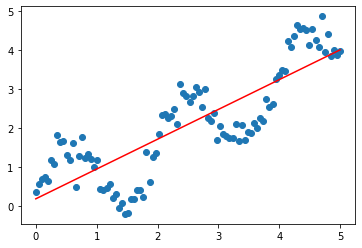

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

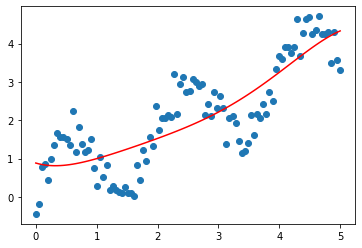

In [15]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [12]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.60843659  1.72945077 -0.66398068  0.12858067 -0.00938732]
interception:  1.2605034940625441


In [13]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.26050349, 1.18359603, 1.11500979, 1.05426119, 1.000886  ,
       0.95443895, 0.91449337, 0.88064082, 0.8524907 , 0.82966993,
       0.81182251, 0.79860921, 0.78970718, 0.78480956, 0.78362514,
       0.78587796, 0.79130697, 0.79966564, 0.81072161, 0.82425627,
       0.84006447, 0.85795407, 0.87774562, 0.89927198, 0.92237793,
       0.94691983, 0.97276521, 0.99979246, 1.02789039, 1.05695791,
       1.08690365, 1.11764556, 1.14911059, 1.18123429, 1.21396041,
       1.24724061, 1.28103401, 1.31530686, 1.35003217, 1.38518932,
       1.42076371, 1.45674639, 1.49313366, 1.52992674, 1.56713137,
       1.60475746, 1.64281871, 1.68133223, 1.72031819, 1.75979944,
       1.79980114, 1.84035038, 1.88147585, 1.9232074 , 1.96557573,
       2.00861201, 2.05234747, 2.0968131 , 2.14203919, 2.18805504,
       2.23488857, 2.2825659 , 2.33111105, 2.38054553, 2.43088797,
       2.48215376, 2.53435469, 2.58749856, 2.6415888 , 2.69662414,
       2.75259822, 2.8094992 , 2.86730941, 2.92600498, 2.98555

In [14]:
regr_poly.predict(X_poly)

array([1.26050349, 1.18359603, 1.11500979, 1.05426119, 1.000886  ,
       0.95443895, 0.91449337, 0.88064082, 0.8524907 , 0.82966993,
       0.81182251, 0.79860921, 0.78970718, 0.78480956, 0.78362514,
       0.78587796, 0.79130697, 0.79966564, 0.81072161, 0.82425627,
       0.84006447, 0.85795407, 0.87774562, 0.89927198, 0.92237793,
       0.94691983, 0.97276521, 0.99979246, 1.02789039, 1.05695791,
       1.08690365, 1.11764556, 1.14911059, 1.18123429, 1.21396041,
       1.24724061, 1.28103401, 1.31530686, 1.35003217, 1.38518932,
       1.42076371, 1.45674639, 1.49313366, 1.52992674, 1.56713137,
       1.60475746, 1.64281871, 1.68133223, 1.72031819, 1.75979944,
       1.79980114, 1.84035038, 1.88147585, 1.9232074 , 1.96557573,
       2.00861201, 2.05234747, 2.0968131 , 2.14203919, 2.18805504,
       2.23488857, 2.2825659 , 2.33111105, 2.38054553, 2.43088797,
       2.48215376, 2.53435469, 2.58749856, 2.6415888 , 2.69662414,
       2.75259822, 2.8094992 , 2.86730941, 2.92600498, 2.98555

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

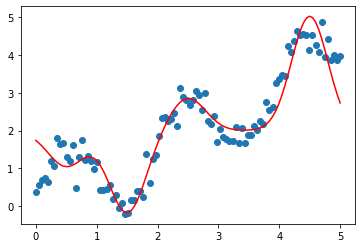

In [21]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.72620466 -1.83462409  1.09615001 -0.01194894  3.09093005]
interception:  1.877906975572715


#### Comparison

In [22]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

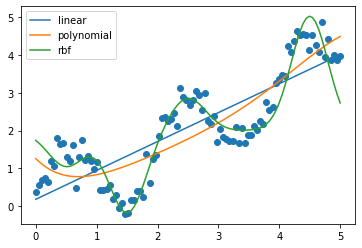

In [23]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [24]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5721043954555621


In [25]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.46415817327136094


In [26]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.1951877422270688
